<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/skhabiri_LS_DS_build2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Unit 2, Sprint 3, Module 2*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [3]:
import pandas as pd
import numpy as np
# !pip install category_encoders==2.*


data = pd.read_csv('https://github.com/skhabiri/FORESTCOVER-METRICS/blob/master/data/train.csv?raw=true')
print(data.shape)
data.head()


(15120, 56)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.nunique().sort_values(ascending=False)

Id                                    15120
Horizontal_Distance_To_Roadways        3250
Horizontal_Distance_To_Fire_Points     2710
Elevation                              1665
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Hydrology        400
Aspect                                  361
Hillshade_3pm                           247
Hillshade_9am                           176
Hillshade_Noon                          141
Slope                                    52
Cover_Type                                7
Soil_Type29                               2
Soil_Type28                               2
Soil_Type5                                2
Soil_Type4                                2
Soil_Type3                                2
Soil_Type2                                2
Soil_Type1                                2
Wilderness_Area4                          2
Wilderness_Area3                          2
Wilderness_Area2                          2
Wilderness_Area1                

In [6]:
pd.Series({c: data[c].unique() for c in data})[-40:]
# [data[col].unique() for col in data]

Soil_Type2                    [0, 1]
Soil_Type3                    [0, 1]
Soil_Type4                    [0, 1]
Soil_Type5                    [0, 1]
Soil_Type6                    [0, 1]
Soil_Type7                       [0]
Soil_Type8                    [0, 1]
Soil_Type9                    [0, 1]
Soil_Type10                   [0, 1]
Soil_Type11                   [0, 1]
Soil_Type12                   [0, 1]
Soil_Type13                   [0, 1]
Soil_Type14                   [0, 1]
Soil_Type15                      [0]
Soil_Type16                   [0, 1]
Soil_Type17                   [0, 1]
Soil_Type18                   [0, 1]
Soil_Type19                   [0, 1]
Soil_Type20                   [0, 1]
Soil_Type21                   [0, 1]
Soil_Type22                   [0, 1]
Soil_Type23                   [0, 1]
Soil_Type24                   [0, 1]
Soil_Type25                   [0, 1]
Soil_Type26                   [0, 1]
Soil_Type27                   [0, 1]
Soil_Type28                   [0, 1]
S

Our target label is "Cover_Type"
We will drop imb% imbalance low cardinal features. We also drop "id" column.

In [13]:
def wrangle_pre(X, imb=0.95):
  print(f'Original data shape: {X.shape}')
  X=X.copy()
  # drop the binary features with imb% imbalance
  mask = X.nunique().sort_values(ascending=False) < 5
  lowcard_col = X.nunique().sort_values(ascending=False)[mask].index

  mask2 = pd.Series({col: X[col].value_counts().max()/X[col].value_counts().sum() for col in lowcard_col}).sort_values(ascending=False)
  mask2 = mask2[mask2 >= imb]

  drop_col = ["Id"] + list(mask2.index)
  print(f' Number of columns to drop: {len(drop_col)}')
  
  return drop_col

def wrangle(X, drop_count=1):
  print("drop_count parameter: ",drop_count)
#   X = X.copy()
  X = X.drop(labels=drop_col[:drop_count], axis=1)
  print(f'X shape during wrangle: {X.shape}')
  return X


In [14]:
from sklearn.model_selection import train_test_split

# Split train into train & val
train, val = train_test_split(data, train_size=0.80, test_size=0.20, stratify=data["Cover_Type"], 
                                random_state=42)
print(f'train: {train.shape}, val: {val.shape}')


# Separate class label and data 
y_train = train["Cover_Type"]
X_train = train.drop("Cover_Type", axis=1)
y_val = val["Cover_Type"]
X_val = val.drop("Cover_Type", axis=1)

train: (12096, 56), val: (3024, 56)


In [15]:
drop_col = wrangle_pre(X_train, 0.7)

Original data shape: (12096, 55)
 Number of columns to drop: 43


In [16]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

from sklearn.metrics import accuracy_score, mean_absolute_error

import random 


In [17]:
print(f' X_train shape before pipeline: {X_train.shape}')

# Make pipeline!
pipeline = make_pipeline(
    FunctionTransformer(wrangle, validate=False), 
    # ce.OrdinalEncoder(), 
    # SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=20, 
                           min_samples_split=20, min_samples_leaf=6, min_weight_fraction_leaf=0.0, 
                           max_features=0.5, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                           random_state=42, verbose=0, warm_start=False, class_weight=None, 
                           ccp_alpha=0.0, max_samples=None)
    )

drop_count = int(0.9*len(drop_col))
pipeline.set_params(functiontransformer__kw_args={'drop_count': drop_count})

# Fit on train, score on val

#.fit: WITHOUT CHANGING X APPLIES THE TRANSFORM AND CHECK TO SEE IF y FITS TRANSFORMED OF X
print("\nfitting ...")
pipeline.fit(X_train, y_train)
print(f' X_train shape after fitting : {X_train.shape}')

print("\ngetting X_train transformed column labels")
wrangle_col = pipeline.named_steps['functiontransformer'].transform(X_train).columns
print(len(X_train.columns), len(wrangle_col), drop_count)
assert len(X_train.columns) == len(wrangle_col) + drop_count

print("\npredicting ...")
y_pred = pipeline.predict(X_val)
print(f' X_val shape after predict : {X_val.shape}')

print("\nAccuracy ...")
print('Training Accuracy', accuracy_score(y_train, pipeline.predict(X_train)))
print('Validation Accuracy', accuracy_score(y_val, y_pred))

 X_train shape before pipeline: (12096, 55)

fitting ...
drop_count parameter:  38
X shape during wrangle: (12096, 17)
 X_train shape after fitting : (12096, 55)

getting X_train transformed column labels
drop_count parameter:  38
X shape during wrangle: (12096, 17)
55 17 38

predicting ...
drop_count parameter:  38
X shape during wrangle: (3024, 17)
 X_val shape after predict : (3024, 55)

Accuracy ...
drop_count parameter:  38
X shape during wrangle: (12096, 17)
Training Accuracy 0.8974867724867724
Validation Accuracy 0.8234126984126984


In [18]:
print(pipeline.named_steps['functiontransformer'].get_params())

{'accept_sparse': False, 'check_inverse': True, 'func': <function wrangle at 0x11bb70f80>, 'inv_kw_args': None, 'inverse_func': None, 'kw_args': {'drop_count': 38}, 'validate': False}


drop_count parameter:  38
X shape during wrangle: (3024, 17)


<AxesSubplot:>

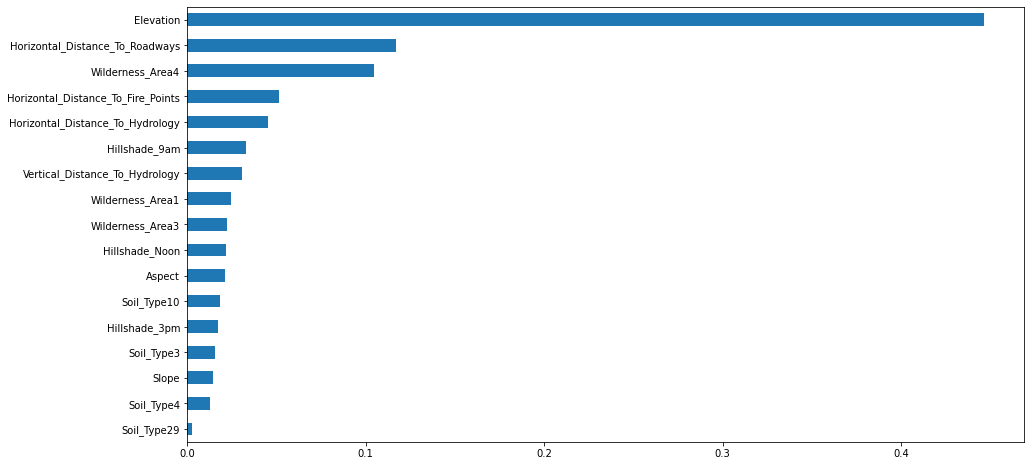

In [28]:
model = pipeline.named_steps['randomforestclassifier']
# encoder = pipeline.named_steps['onehotencoder']
# encoded_columns = encoder.transform(X_val).columns
fnx = pipeline.named_steps['functiontransformer']
features = fnx.transform(X_val).columns
importances = pd.Series(data=model.feature_importances_,index=features)
plt.figure(figsize=(15,8))
importances.sort_values().plot.barh()

In [30]:
par_name = "drop_count"
param_range = [{par_name: i} for i in range(len(drop_col))]
param_range[:10]

[{'drop_count': 0},
 {'drop_count': 1},
 {'drop_count': 2},
 {'drop_count': 3},
 {'drop_count': 4},
 {'drop_count': 5},
 {'drop_count': 6},
 {'drop_count': 7},
 {'drop_count': 8},
 {'drop_count': 9}]

train scores [[0.90378255 0.90038235 0.89604216 0.90172574 0.90069236]
 [0.89913187 0.89097861 0.89469877 0.89521546 0.89438876]
 [0.89355105 0.89015191 0.89201199 0.89542213 0.89459543]
 [0.89820174 0.89139196 0.89356205 0.89304537 0.88994523]
 [0.8970649  0.89707554 0.89242534 0.89387207 0.89294203]
 [0.8974783  0.892322   0.89004857 0.89025524 0.89604216]
 [0.8938611  0.88808515 0.89263201 0.89469877 0.88994523]
 [0.89251757 0.89366539 0.89046192 0.89449209 0.89159864]
 [0.89334436 0.89438876 0.89449209 0.89097861 0.8893252 ]
 [0.89923522 0.8953188  0.89211532 0.89552547 0.89242534]
 [0.89375775 0.89345872 0.88963522 0.89283869 0.88550171]
 [0.89479124 0.89242534 0.89304537 0.89438876 0.89500878]
 [0.89551468 0.89356205 0.89170197 0.89356205 0.88777514]
 [0.89541133 0.89438876 0.89438876 0.89252868 0.89449209]
 [0.89375775 0.89376873 0.89748889 0.88839516 0.89252868]
 [0.89954527 0.89283869 0.89583549 0.89201199 0.88736179]
 [0.89582472 0.88963522 0.892322   0.89345872 0.89500878]
 

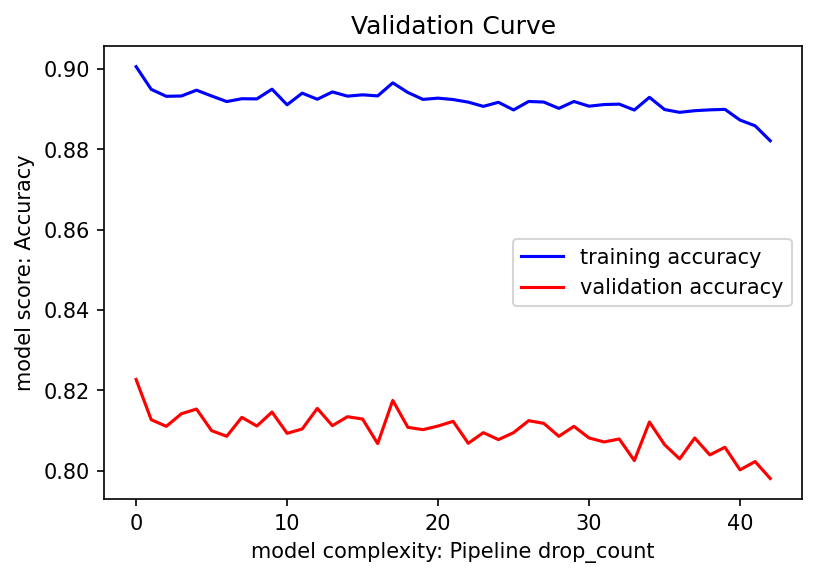

In [31]:
#Sweep over different values for drop_count, upto. the length of drop_col
par_name = "drop_count"
param_range = [{par_name: i} for i in range(len(drop_col))]
param_rangex = [i for i in range(len(drop_col))]

# par_name = "max_features"
# param_range = np.arange(0.1,1.1,0.1)
# param_rangex = param_range
               
# par_name = "max_depth"
# param_range = range(1,25,1)
# param_rangex = param_range

# par_name = "min_samples_split"
# param_range = np.linspace(10, 0.01*len(X_train), 10, endpoint=True).astype(int)
# param_rangex = param_range

# par_name = "min_samples_leaf"
# param_range = np.linspace(2, 0.001*len(X_train), 10, endpoint=True).astype(int)
# param_rangex = param_range

# par_name = "criterion"
# param_range = ["gini", "entropy"]
# param_rangex = param_range


train_scores, val_scores = validation_curve(
    pipeline, X_train, y_train,
    param_name='functiontransformer__kw_args',
    # param_name='randomforestclassifier__'+ par_name, 
    
    param_range=param_range, 
    scoring='accuracy', 
    cv=5,
    n_jobs=-1
)
print("train scores", train_scores)
# average over all CV folds
print("train scores mean", np.mean(train_scores, axis=1))

# Averaging CV scores
plt.figure(dpi=150)
plt.plot(param_rangex, np.mean(train_scores, axis=1), color='blue', label='training accuracy')
plt.plot(param_rangex, np.mean(val_scores, axis=1), color='red', label='validation accuracy')
plt.title('Validation Curve')
plt.xlabel(f'model complexity: Pipeline {par_name}')
plt.ylabel('model score: Accuracy')
plt.legend();

In [32]:
print('Model Hyperparameters:')
print(pipeline.named_steps['functiontransformer'])

Model Hyperparameters:
FunctionTransformer(func=<function wrangle at 0x11bb70f80>,
                    kw_args={'drop_count': 38})


In [33]:
# pipe = make_pipeline(FunctionTransformer(log_columns, ), PCA(), SVC())

# param_grid = dict(
#     functiontransformer__kw_args=[
#         {'col_idx': None},
#         {'col_idx': [1]}
#     ],
#     pca__n_components=[2, 5, 10],
#     svc__C=[0.1, 10, 100],
# )
# grid_search = GridSearchCV(pipe, param_grid=param_grid)

# digits = load_digits()
# res = grid_search.fit(digits.data, digits.target)      

In [34]:
X_train.shape

(12096, 55)

In [35]:
print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

x_n_iter = 2

param_distributions = {
    # 'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
     'functiontransformer__kw_args': [{par_name: i} for i in range(int(0.3*len(drop_col)))],
    'randomforestclassifier__min_samples_leaf': [random.randint(1, 100) for i in range(3)], 
    # 'randomforestclassifier__max_depth': [random.randint(7, 58) for i in range(x_n_iter)], 
}

search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=x_n_iter, 
    cv=2, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train)
print('Best hyperparameters', search.best_params_)
print('Cross-validation Accuracy', search.best_score_)


Model Hyperparameters:
RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.5,
                       min_samples_leaf=6, min_samples_split=20,
                       n_estimators=10, n_jobs=-1, random_state=42)
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.0s finished


drop_count parameter:  8
X shape during wrangle: (12096, 47)
Best hyperparameters {'randomforestclassifier__min_samples_leaf': 85, 'functiontransformer__kw_args': {'drop_count': 8}}
Cross-validation Accuracy 0.6969246031746033


In [37]:
pipeline = search.best_estimator_
pipeline.get_params()

{'memory': None,
 'steps': [('functiontransformer',
   FunctionTransformer(func=<function wrangle at 0x11bb70f80>,
                       kw_args={'drop_count': 8})),
  ('randomforestclassifier',
   RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.5,
                          min_samples_leaf=85, min_samples_split=20,
                          n_estimators=10, n_jobs=-1, random_state=42))],
 'verbose': False,
 'functiontransformer': FunctionTransformer(func=<function wrangle at 0x11bb70f80>,
                     kw_args={'drop_count': 8}),
 'randomforestclassifier': RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.5,
                        min_samples_leaf=85, min_samples_split=20,
                        n_estimators=10, n_jobs=-1, random_state=42),
 'functiontransformer__accept_sparse': False,
 'functiontransformer__check_inverse': True,
 'functiontransformer__func': <function __main__.wrangle(X, drop_count=1)>,
 'functiontransformer__

In [38]:
wrangle_col = pipeline.named_steps['functiontransformer'].transform(X_train).columns
len(wrangle_col)

drop_count parameter:  8
X shape during wrangle: (12096, 47)


47

In [39]:
pipeline.named_steps['functiontransformer'].get_params()

{'accept_sparse': False,
 'check_inverse': True,
 'func': <function __main__.wrangle(X, drop_count=1)>,
 'inv_kw_args': None,
 'inverse_func': None,
 'kw_args': {'drop_count': 8},
 'validate': False}

In [ ]:
#.predict: WITHOUT ACTUALLY TRANSFORMING X, APPLIES THE TRANSFORMS TO X AND PREDICT a fitted y
# wrangle_col = pipeline.named_steps['functiontransformer'].transform(X_train).columns


print(f' X_val shape before predict : {X_val.shape}')
print("predicting ...")
y_pred = pipeline.predict(X_val)
print(f' X_val shape after predict : {X_val.shape}')
print('Validation Accuracy', accuracy_score(y_val, y_pred))

 X_val shape before predict : (3024, 55)
predicting ...
drop_count parameter:  3
X shape during wrangle: (3024, 52)
 X_val shape after predict : (3024, 55)
Validation Accuracy 0.783068783068783


In [ ]:
y_train.value_counts(normalize=True)

7    0.142857
6    0.142857
5    0.142857
4    0.142857
3    0.142857
2    0.142857
1    0.142857
Name: Cover_Type, dtype: float64